<a href="https://colab.research.google.com/github/rskarbez/colab_notebooks/blob/main/CSE2DV_CSE5INV_Week_9_lab_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE2DV/CSE5INV - Week 8 lab notebook

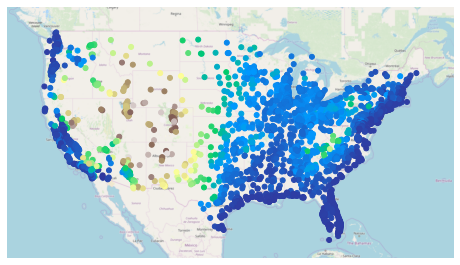

In this week's lab - brought to you once again as a Google Colab worksheet - we're going to learn how to use Python libraries to visualize spatial data. Specifically, where last week we were using `pandas` and `seaborn`, this week we're going to start off with `geopandas` and `geoplot`.

`geopandas`, as you may have guessed, extends the `pandas` data processing library to enable spatial operations on GEOmetry. `geoplot`, like `seaborn` last week, is an extension of `matplotlib`. As the `geoplot` documentation says: It's like `seaborn` for geospatial.

You should already be at least a little bit familiar with Python and Colab. With that said, let's get started by running the code in the next cell!

In [15]:
# geopandas is not available on Google Colab by default,
#   so we need to bring it in using conda
# NOTE: This may take several minutes! Start it now, and please be patient!
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install geopandas
!mamba install geoplot

# Do the relevant imports of pandas, geopandas, and geoplot
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.25.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['geopandas']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noa

# Choropleth maps

One type of visualization that is enabled by `geoplot` is the choropleth map, which was discussed in lecture this week. The choropleth map plots geographic geometry - here, POLYGON datatypes - where geographic districts are colored based on the values of a quantitative variable.

Let's load a sample dataset and peek at the data, making sure that it does define a `geometry` attribute with data type `POLYGON`.

In [21]:
# Load the New York census dataset
ny_census = gpd.read_file(gplt.datasets.get_path('ny_census'))

# Create a new quantitative attribute and add it to the ny_census dataframe
# The new attribute is percent_white and is computed as the WHITE attribute for
#   each census tract divided by the total population (POP2000) for that tract
ny_census = ny_census.assign(
    percent_white=ny_census['WHITE'] / ny_census['POP2000']
)

# Take a peek at the dataset
ny_census.head()

,id,POP2000,WHITE,geometry,percent_white
0,0,111931,105782,"POLYGON ((-74.71240 44.95301, -74.71113 44.953...",0.945064
1,1,79894,74562,"POLYGON ((-74.02503 44.98004, -74.02740 44.995...",0.933262
2,2,51134,42970,"POLYGON ((-74.02503 44.98004, -74.02108 44.958...",0.840341
3,3,38851,36848,"POLYGON ((-73.46412 44.53540, -73.46494 44.536...",0.948444
4,4,111738,99118,"POLYGON ((-75.86007 44.40327, -75.83967 44.393...",0.887057


Having confirmed that we have the geometry needed to draw a choropleth map, the next step is simply to create the map. This is done with `geoplot`'s `choropleth()` function.

For more documentation on this function, see [Choropleth](https://residentmario.github.io/geoplot/plot_references/plot_reference.html#choropleth) in `geoplot`'s documentation.

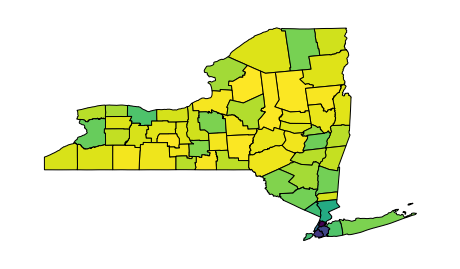

In [26]:

# Create a choropleth map visualization of the percentage of white residents in
#   each census tract.
# The first argument must be a pandas dataframe.
# The hue argument is the name of the attribute that will be used to select the
#   color for each district.
gplt.choropleth(ny_census, hue='percent_white')


With that, we already have a decent - albeit slightly suboptimal - choropleth map. There are, as you might expect, many options that enable configuration of such choropleth maps. Some of the options available (accessed by passing named arguments to the `choropleth()` call, as in the following example) are:


*   `cmap`: The (quantitative) colormap to be used
*   `scheme`: The (categorical) colormap to be used
*   `linewidth`: How many pixels wide the district boundaries are drawn
*   `edgecolor`: What color is used to draw the district boundaries
*   `legend`: Whether to display a legend (you almost always should)
*   `projection`: Which map projection to use

The following code block uses some of these options to generate a more compelling - at least, in my opinion - version of the New York census data choropleth map:



Text(0.5, 1.0, 'Percentage White Residents, 2000')

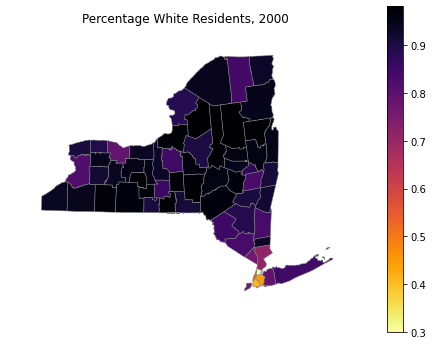

In [28]:
# Create a choropleth map visualization of the percentage of white residents in
#   each census tract
gplt.choropleth(
    ny_census,
    hue='percent_white',
    cmap='inferno_r', linewidth=0.5,
    edgecolor='gray',
    legend=True,
    projection=gplt.crs.AlbersEqualArea()
)
plt.title("Percentage White Residents, 2000")

# Symbol maps (well, one type of symbol map)

It is not easy to make sophisticated symbol maps, even using `geoplot`. However, it is possible to create a point plot with one point per region. That's what were going to do.

In [43]:
# Load some interesting datasets
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))

# The contiguous_usa map does not contain Hawaii, Alaska, or Puerto Rico
#   So filter cities in those districts out of the usa_cities dataset
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
continental_usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [30]:
# This shows you how to load data from a csv file into pandas
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep="\t")
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [31]:
# This shows you how to incorporate data from a "plain" pandas dataset into
#   a geospatial dataset
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


In [33]:
# Let's start by just visualizing our geo_obesity dataset as a choropleth map,
#   to see what it looks like and to get a bit of practice
[YOUR CODE GOES HERE]

SyntaxError: ignored

Now, instead of a choropleth map, we're going to change it to be a simple symbol map. We'll create one mark (a circle) for each state, and make its color correspond to `Percent` (the percent of adults with obesity in each state).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Percentage of adults who are obese by state')

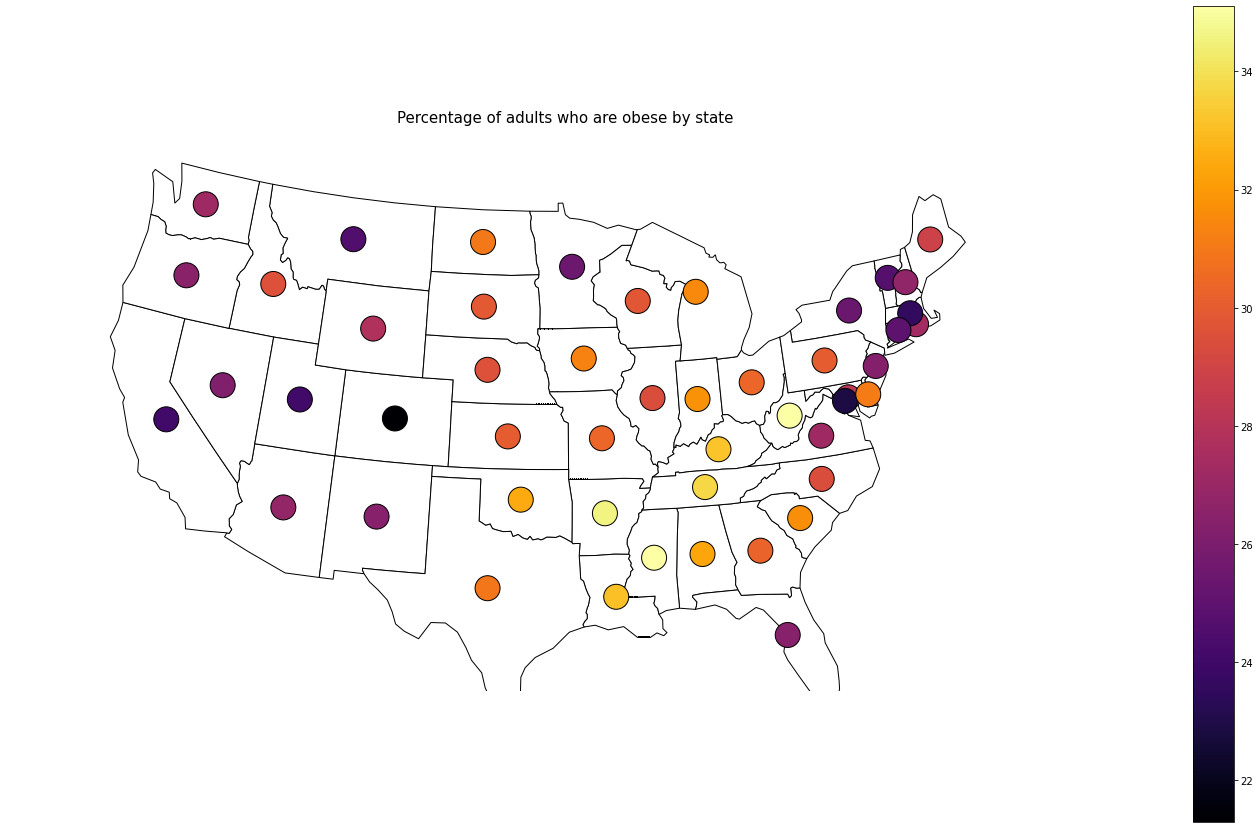

In [65]:
# Plot the outlines of the states using polyplot
obesity_map_axes = gplt.polyplot(contiguous_usa, 
                                 facecolor = 'white', 
                                 figsize = (25, 15),
                                 projection = gplt.crs.AlbersEqualArea()
                                 )

# Convert the POLYGONS in geo_obesity to POINTS in geo_obesity_2
geo_obesity_2 = geo_obesity.copy()
# The 'centroid' of a polygon is its central point
geo_obesity_2['geometry'] = geo_obesity_2['geometry'].centroid

# Create a dot density map (in geoplot terms, a pointplot)
#   with one point per state
gplt.pointplot(geo_obesity_2,
                  hue = 'Percent',
                  scale = 'Percent',
                  limits = (25, 25),
                  cmap = 'inferno',
                  ax = obesity_map_axes,
                  edgecolor = 'black',
                  legend = True,
                  legend_var = 'hue'
                 )

plt.title("Percentage of adults who are obese by state", fontdict={"fontsize": 15}, pad=15)

# Dot density maps (a/k/a `geoplot` point plots)

In that last example, we've already seen `pointplot()`, the function `geoplot` uses to create dot density maps. Now let's make one!

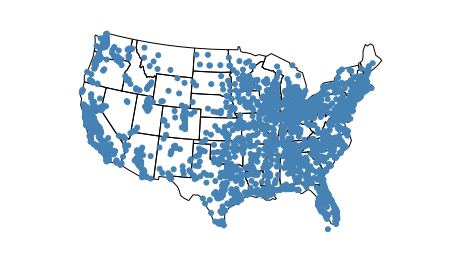

In [66]:
ax = gplt.polyplot(contiguous_usa, projection=gplt.crs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

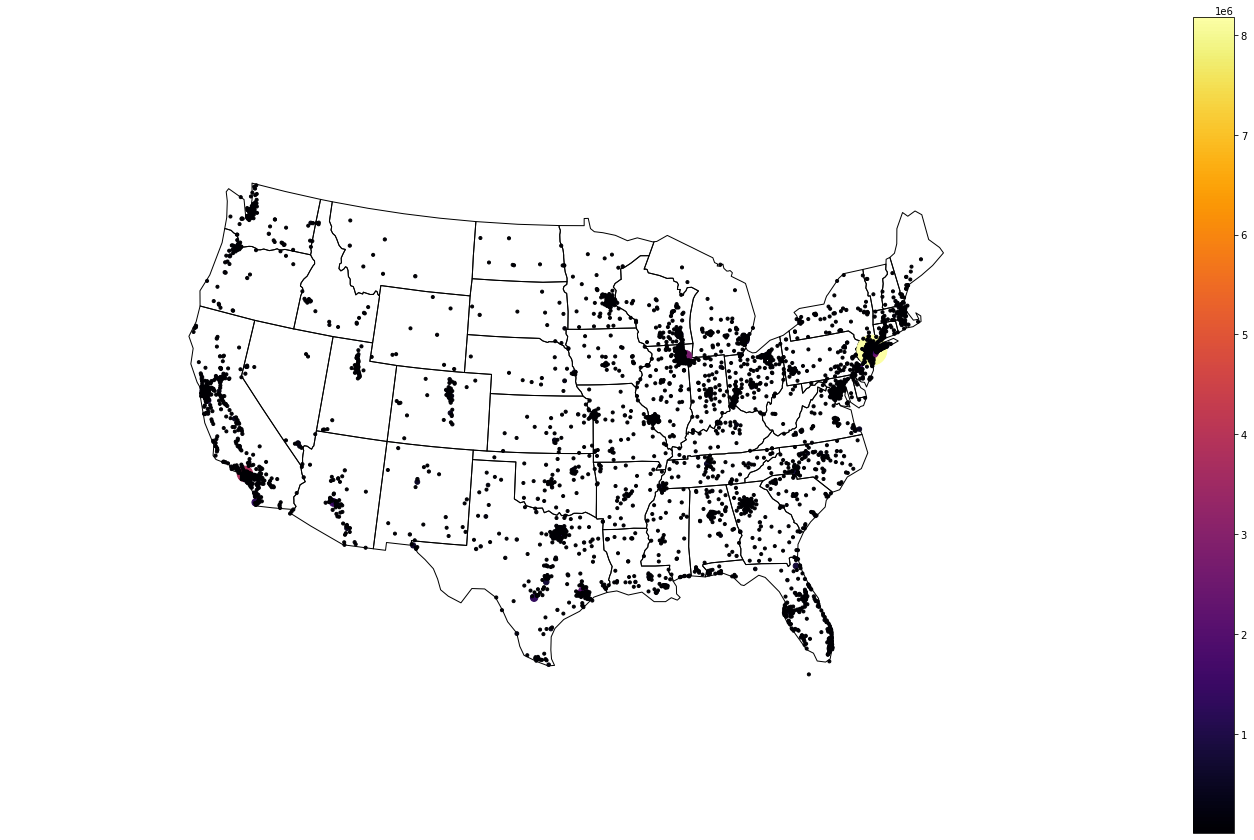

In [75]:
# Let's customize this map. We'll set hue and scale to vary with the population 
#   of each city.
ax = gplt.polyplot(contiguous_usa, 
                   projection=gplt.crs.AlbersEqualArea(), 
                   figsize = (25, 15)
                  )

gplt.pointplot(continental_usa_cities, 
               hue='POP_2010',
               scale = 'POP_2010',
               cmap = 'inferno', 
               limits = (3, 30),
               ax=ax,
               legend = True,
               legend_var = 'hue'
              )

# Cartograms

Geoplot can also be used to create cartograms. Let's return to the obesity dataset from earlier.

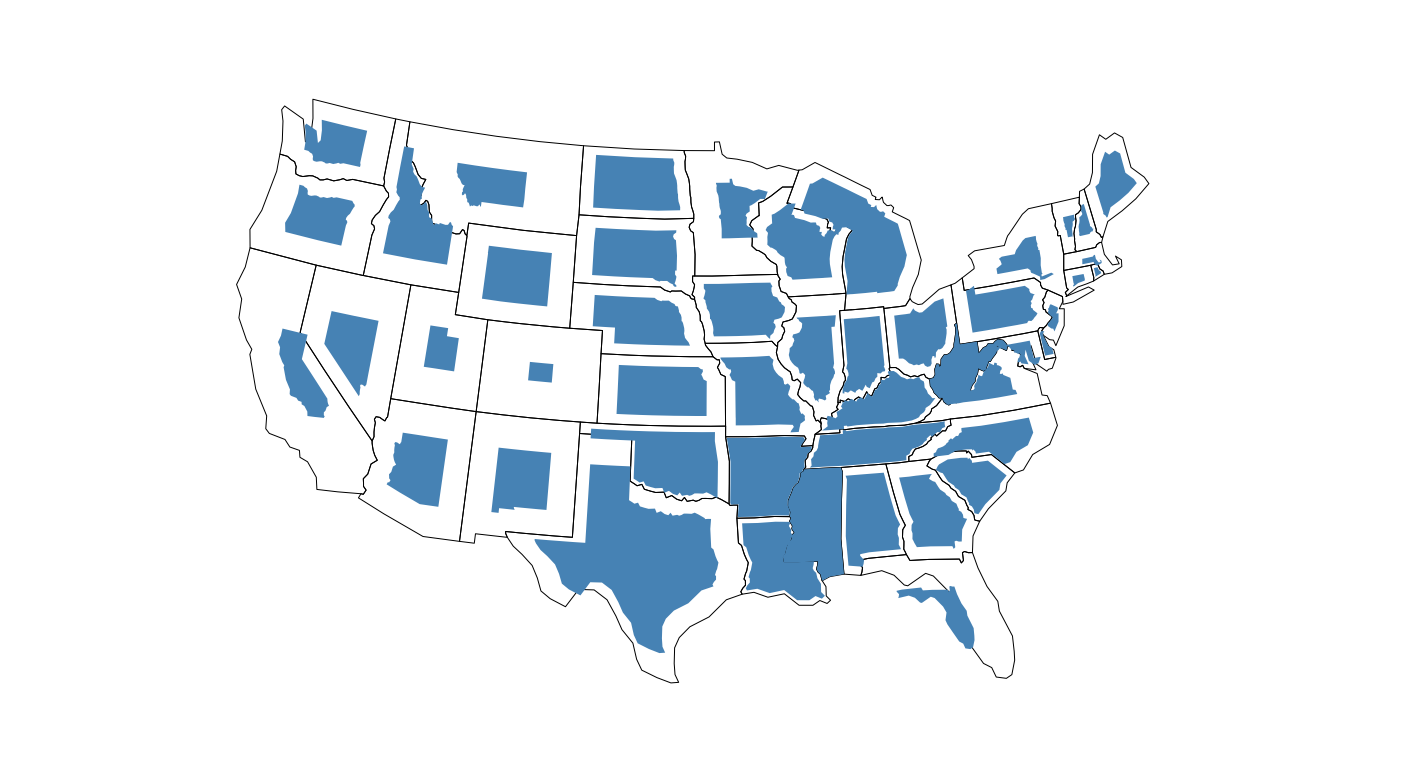

In [79]:
ax = gplt.polyplot(contiguous_usa, 
                   projection=gplt.crs.AlbersEqualArea(), 
                   figsize = (25, 15)
                  )

gplt.cartogram(
    geo_obesity,
    scale="Percent",
    projection=gplt.crs.AlbersEqualArea(),
    ax = ax
)

# Voronoi diagrams

We haven't really talked about these yet, but they're pretty cool, and easy to make with `geoplot`.

Fun fact: This is actually how Melbourne decides what government schools students are eligible to attend. (Students are always eligible to attend the nearest school to where they live, measured by straight-line distance. The result of this is a Voronoi diagram where the points are the school locations!)

In [11]:
# Load two Melbourne-centric datasets that come with geoplot
melbourne = gpd.read_file(gplt.datasets.get_path('melbourne'))
melbourne_schools = gpd.read_file(gplt.datasets.get_path('melbourne_schools'))

# Let's take a peek at the data in the melbourne_schools dataset
melbourne_schools.head()

,Education_Sector,School_No,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,Address_Postcode,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,geometry
0,Government,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,None,Warrandyte,VIC,3113,5-11 Forbes Street,None,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),POINT (145.21398 -37.74267)
1,Government,40,Berwick Primary School,Primary,O,37 Fairholme Boulevard,None,Berwick,VIC,3806,37 Fairholme Boulevard,None,Berwick,VIC,3806,03 9707 1026,161,Casey (C),POINT (145.35374 -38.04418)
2,Government,84,Cheltenham Primary School,Primary,O,231 Charman Road,None,Cheltenham,VIC,3192,231 Charman Road,None,CHELTENHAM,VIC,3192,03 8585 3200,91,Bayside (C),POINT (145.05463 -37.96861)
3,Government,113,Newport Lakes Primary School,Primary,O,Elizabeth Street,None,Newport,VIC,3015,Elizabeth Street,None,NEWPORT,VIC,3015,03 9391 8942,311,Hobsons Bay (C),POINT (144.87834 -37.83842)
4,Government,128,St Andrews Primary School,Primary,O,Caledonia Street,None,St Andrews,VIC,3761,Caledonia Street,None,ST ANDREWS,VIC,3761,03 9710 1255,571,Nillumbik (S),POINT (145.26983 -37.60232)


Text(0.5, 1.0, 'Primary Schools in Greater Melbourne, 2018')

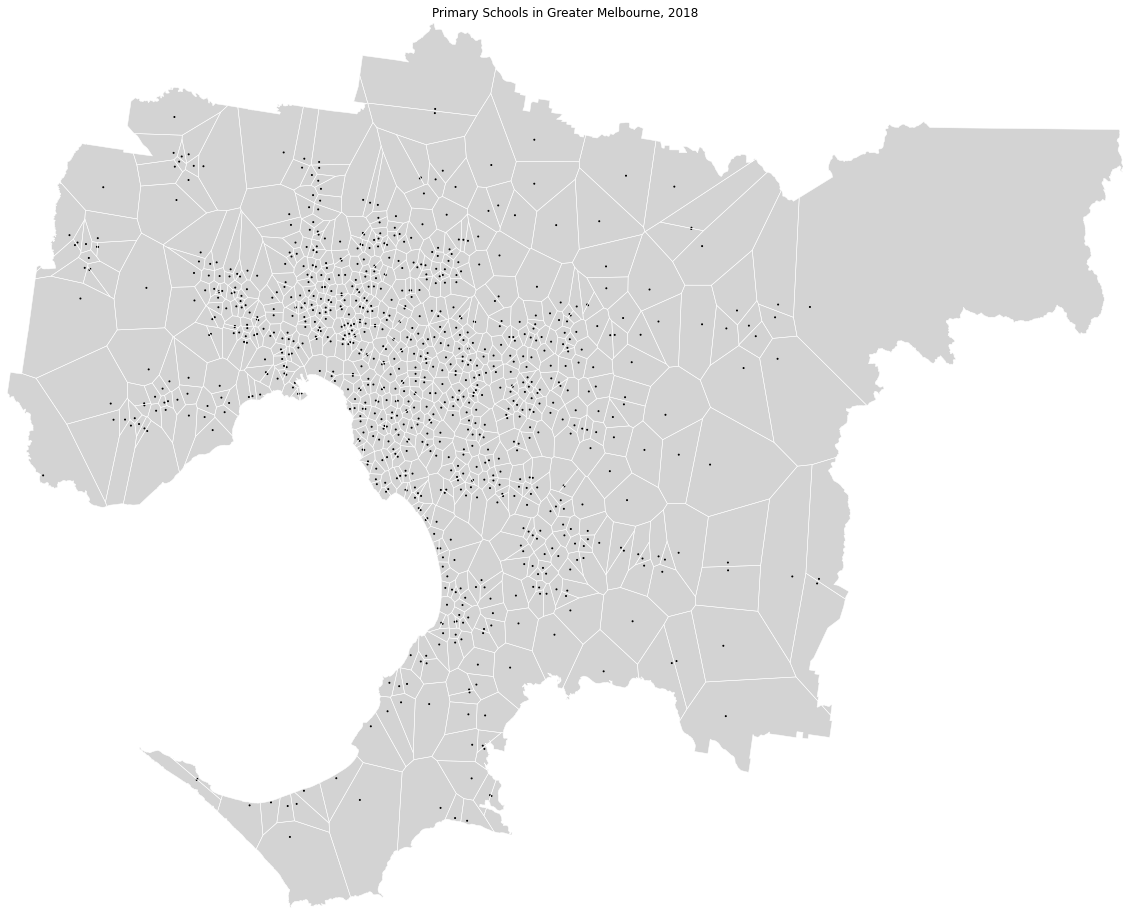

In [80]:
# Get only the primary schools out of the melbourne_schools dataset
melbourne_primary_schools = melbourne_schools.query('School_Type == "Primary"')

# Define the base figure (AXes)
# Create a voronoi diagram - divide space into the districts that are closest to
#   a specified set of points, in this case Melbourne's primary schools
# https://en.wikipedia.org/wiki/Voronoi_diagram
ax = gplt.voronoi(
    melbourne_primary_schools, 
    clip=melbourne, 
    linewidth=0.5, 
    edgecolor='white',
    figsize = (20, 20),
    projection=gplt.crs.Mercator()
)

# Plot the Melbourne region (the melbourne geometry dataset)
#  gplt.polyplot is used to plot POLYgons
gplt.polyplot(melbourne, edgecolor='None', facecolor='lightgray', ax=ax)

# Plot the primary schools in melbourne (the melbourne_primary_schools dataset)
#   gplt.pointplot plots POINTs
gplt.pointplot(melbourne_primary_schools, color='black', ax=ax, s=1, extent=melbourne.total_bounds)

# Update the plot title to be more useful
plt.title('Primary Schools in Greater Melbourne, 2018')


# That's geospatial visualization for you

That's it for today. See you next week.